<a href="https://colab.research.google.com/github/ernestohp/TecnicasIA/blob/main/TIA_Actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1
# Descripción de dataset  y comparación de Algoritmos de Clasificación

Utilizamos el dataset de carrosdesde esta ubicación:
https://raw.githubusercontent.com/ernestohp/TecnicasIA/main/Laboratorio_dataset_car.csv

- Analizaremos el dataset textual y gráficamente
- Usaremos dos algoritmos de clasificación y vamos a comparar con distintos criterios

In [ ]:
# Importamos todas las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Análisis del Dataset - numérico y grafico

In [ ]:
#Leemos el dataset desde la ruta publica
url = "https://raw.githubusercontent.com/ernestohp/TecnicasIA/main/Laboratorio_dataset_car.csv"
dataset = pd.read_csv(url, sep=";")

In [ ]:
#Mostramos la cantidad de filas y columnas
print(dataset.shape)

(1750, 7)


In [ ]:
#verificamos si hay datos nulos en algún atributo
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB
None


In [ ]:
#mostramos un resumen estadístico de los datos
print(dataset.describe())

       Buying Maintenance Doors Person lug_boot safety  class
count    1750        1750  1750   1750     1750   1750   1750
unique      4           4     4      3        3      3      4
top     vhigh         low     2      4      big   high  unacc
freq      443         447   444    587      585    590   1215


In [ ]:
#distribución de los datos por clases
print(dataset.groupby('class').size())

class
acc       390
good       75
unacc    1215
vgood      70
dtype: int64


In [ ]:
#valores por cada atributo. Por ejemplo valores unicos del atributo Buying
print(dataset.groupby('Buying').size())

Buying
high     432
low      437
med      438
vhigh    443
dtype: int64


In [ ]:
#inspeccionamos el dataset
print(dataset.head(3))

  Buying Maintenance Doors Person lug_boot safety  class
0  vhigh       vhigh     2      2    small    low  unacc
1  vhigh       vhigh     2      2    small    med  unacc
2  vhigh       vhigh     2      2    small   high  unacc


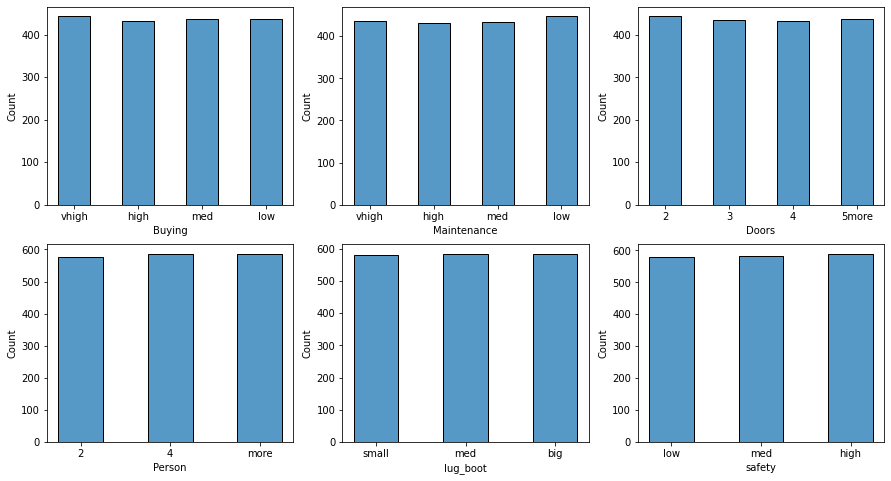

In [ ]:
#Histograma de los atributos
fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (15, 8))
sns.histplot(data=dataset, x="Buying", ax= ax[0, 0], shrink=.5)
sns.histplot(data=dataset, x="Maintenance", ax= ax[0, 1], shrink=.5)
sns.histplot(data=dataset, x="Doors", ax= ax[0, 2], shrink=.5)
sns.histplot(data=dataset, x="Person", ax= ax[1, 0], shrink=.5)
sns.histplot(data=dataset, x="lug_boot", ax= ax[1, 1], shrink=.5)
sns.histplot(data=dataset, x="safety", ax= ax[1, 2], shrink=.5)
plt.show()

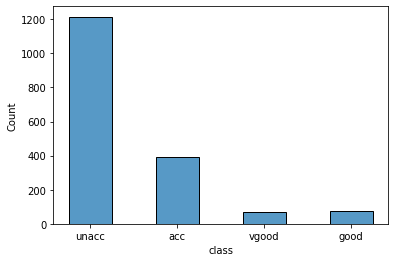

In [ ]:
#histograma para las clases
sns.histplot(data=dataset, x="class", shrink=.5)
plt.show()



# Comparación de Algoritmos de Clasificación

###Codificamos los atributos en datos numéricos

In [ ]:
#-----codificación de los atributos-----
labelencoder = LabelEncoder()

#Buying (low:0, med:1, high:2, vhigh:3)
d1 = dataset['Buying'].replace("low","A").replace("med","B").replace("high", "C").replace("vhigh", "D")
dataset['Buying'] = labelencoder.fit_transform(d1)

#Maintenance (low:0, med:1, high:2, vhigh:3)
d1 = dataset['Maintenance'].replace("low","A").replace("med","B").replace("high", "C").replace("vhigh", "D")
dataset['Maintenance'] = labelencoder.fit_transform(d1)

#Doors (2:2, 3:3, 4:4, 5more:5)
d1 = dataset['Doors'].replace("5more","5")
dataset['Doors'] = d1

#Person (2:2, 4:4, more:5)
d1 = dataset['Person'].replace("more","5")
dataset['Person'] = d1

#lug_boot (low:0, med:1, high:2)
d1 = dataset['lug_boot'].replace("small","A").replace("med","B").replace("big", "C")
dataset['lug_boot'] = labelencoder.fit_transform(d1)

#safety (low:0, med:1, high:2)
d1 = dataset['safety'].replace("low","A").replace("med","B").replace("high", "C")
dataset['safety'] = labelencoder.fit_transform(d1)


In [ ]:
#verificamos el dataset
dataset

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,3,3,2,2,0,0,unacc
1,3,3,2,2,0,1,unacc
2,3,3,2,2,0,2,unacc
3,3,3,2,2,1,0,unacc
4,3,3,2,2,1,1,unacc
...,...,...,...,...,...,...,...
1745,0,0,5,5,1,2,vgood
1746,0,0,5,5,1,2,vgood
1747,0,0,5,5,2,0,unacc
1748,0,0,5,5,2,1,good


### Dividimos el dataset en datos de entrenamiento y datos de prueba

In [ ]:
# Dividimos el dataset en 80% de datos para entrenar y 20% para test
array = dataset.values
X = array[:,0:6]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1, shuffle = True)

#Verificamos los datos de entrenamiento y validación
print(X_validation.shape, Y_validation.shape, X_train.shape, Y_train.shape)

(350, 6) (350,) (1400, 6) (1400,)


### Análisis individual de los algoritmos

*   Algoritmo DecisionTreeClassifier
*   Algoritmo RandomForestClassifier

In [45]:
#Algoritmo DecisionTreeClassifier
dte = DecisionTreeClassifier()
dte.fit(X_train, Y_train)
predictions = dte.predict(X_validation)

In [63]:
print("Accuracy", accuracy_score(Y_validation, predictions))
print("Matriz de confusion:\n",confusion_matrix(Y_validation, predictions))
print("Métricas:\n",classification_report(Y_validation, predictions,zero_division=0.0))

Accuracy 0.8685714285714285
Matriz de confusion:
 [[ 66   0  11   0]
 [ 18   0   0   0]
 [  7   0 238   0]
 [ 10   0   0   0]]
Métricas:
               precision    recall  f1-score   support

         acc       0.65      0.86      0.74        77
        good       0.00      0.00      0.00        18
       unacc       0.96      0.97      0.96       245
       vgood       0.00      0.00      0.00        10

    accuracy                           0.87       350
   macro avg       0.40      0.46      0.43       350
weighted avg       0.81      0.87      0.84       350



In [52]:
#Algoritmo RandomForestClassifier
#rfc = RandomForestClassifier(criterion='gini', n_jobs=2, random_state=0, max_depth=4)
rfc = RandomForestClassifier(random_state=0, max_depth=4)
rfc.fit(X_train, Y_train)
predictions2 = rfc.predict(X_validation)


In [65]:
print("Accuracy", accuracy_score(Y_validation, predictions2))
print("Matriz de confusion:\n",confusion_matrix(Y_validation, predictions2))
print("Métricas:\n",classification_report(Y_validation, predictions2, zero_division=0.0))

Accuracy 0.8685714285714285
Matriz de confusion:
 [[ 66   0  11   0]
 [ 18   0   0   0]
 [  7   0 238   0]
 [ 10   0   0   0]]
Métricas:
               precision    recall  f1-score   support

         acc       0.65      0.86      0.74        77
        good       0.00      0.00      0.00        18
       unacc       0.96      0.97      0.96       245
       vgood       0.00      0.00      0.00        10

    accuracy                           0.87       350
   macro avg       0.40      0.46      0.43       350
weighted avg       0.81      0.87      0.84       350



###Análisis comparativo de los algoritmos

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.862143 (0.021201)
CART: 0.975714 (0.011157)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


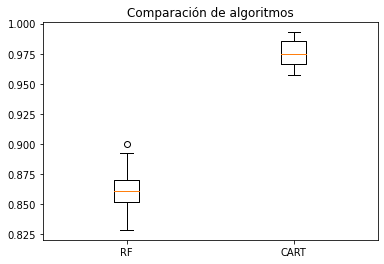

In [55]:
# Agregamos los algoritmos
models = []
models.append(('RF', rfc))
models.append(('CART', dte))

# evaluamos cada modelo
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Comparamos los algoritmos
plt.boxplot(results, labels=names)
plt.title('Comparación de algoritmos')
plt.show()

